In [1]:
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS

from smt_explainability.pdp.partial_dependence_display import PartialDependenceDisplay
from smt_explainability.pdp.pd_feature_importance_display import PDFeatureImportanceDisplay
from smt_explainability.pdp.pd_interaction_display import PDFeatureInteractionDisplay

from sklearn.metrics import mean_squared_error

In [2]:
ndoe = 100
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8 * ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

## config
feature_names = [
    r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
    r'$q$', r'$\lambda$', r'$t_{c}$', r'$N_{z}$', 
    r'$W_{dg}$', r'$W_{p}$',
]

class GroundTruthModel:
    def predict_values(self, X):
        return fun(X)
    
# kriging model
sm = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
sm.set_training_values(
    X_tr,
    y_tr
    )

sm.train()

print("Surrogate model")
y_pred = sm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

# ground truth model
gtm = GroundTruthModel()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  7.2136431
Surrogate model
RMSE: 0.6717
rRMSE: 0.0025


/Users/muhammaddaffarobani/miniconda3/envs/smt_ex_310/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


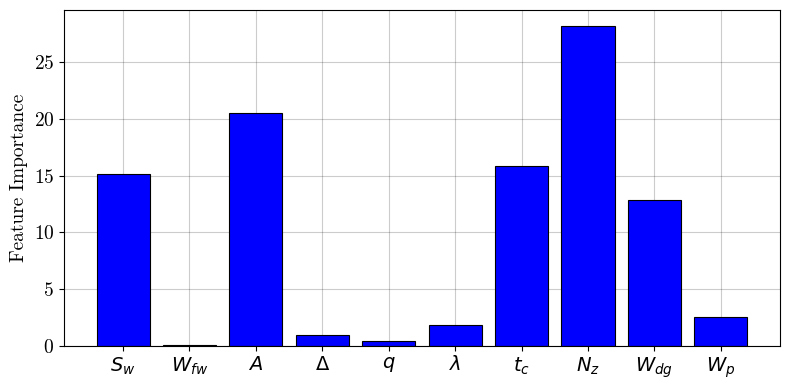

In [3]:
model = gtm

gt_pdd_importance = PDFeatureImportanceDisplay.from_surrogate_model(model, X_tr, feature_names=feature_names)
gt_pdd_importance_fig = gt_pdd_importance.plot(sort=False, figsize=[8, 4])
gt_pdd_importance_fig

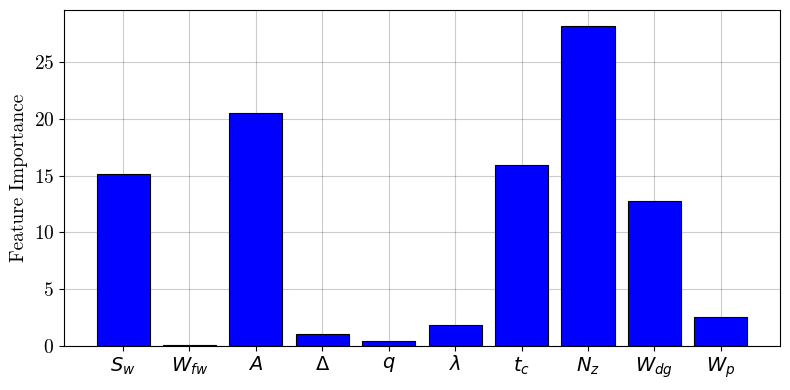

In [4]:
model = sm

pdd_importance = PDFeatureImportanceDisplay.from_surrogate_model(model, X_tr, feature_names=feature_names)
pdd_importance_fig = pdd_importance.plot(sort=False, figsize=[8, 4])
pdd_importance_fig

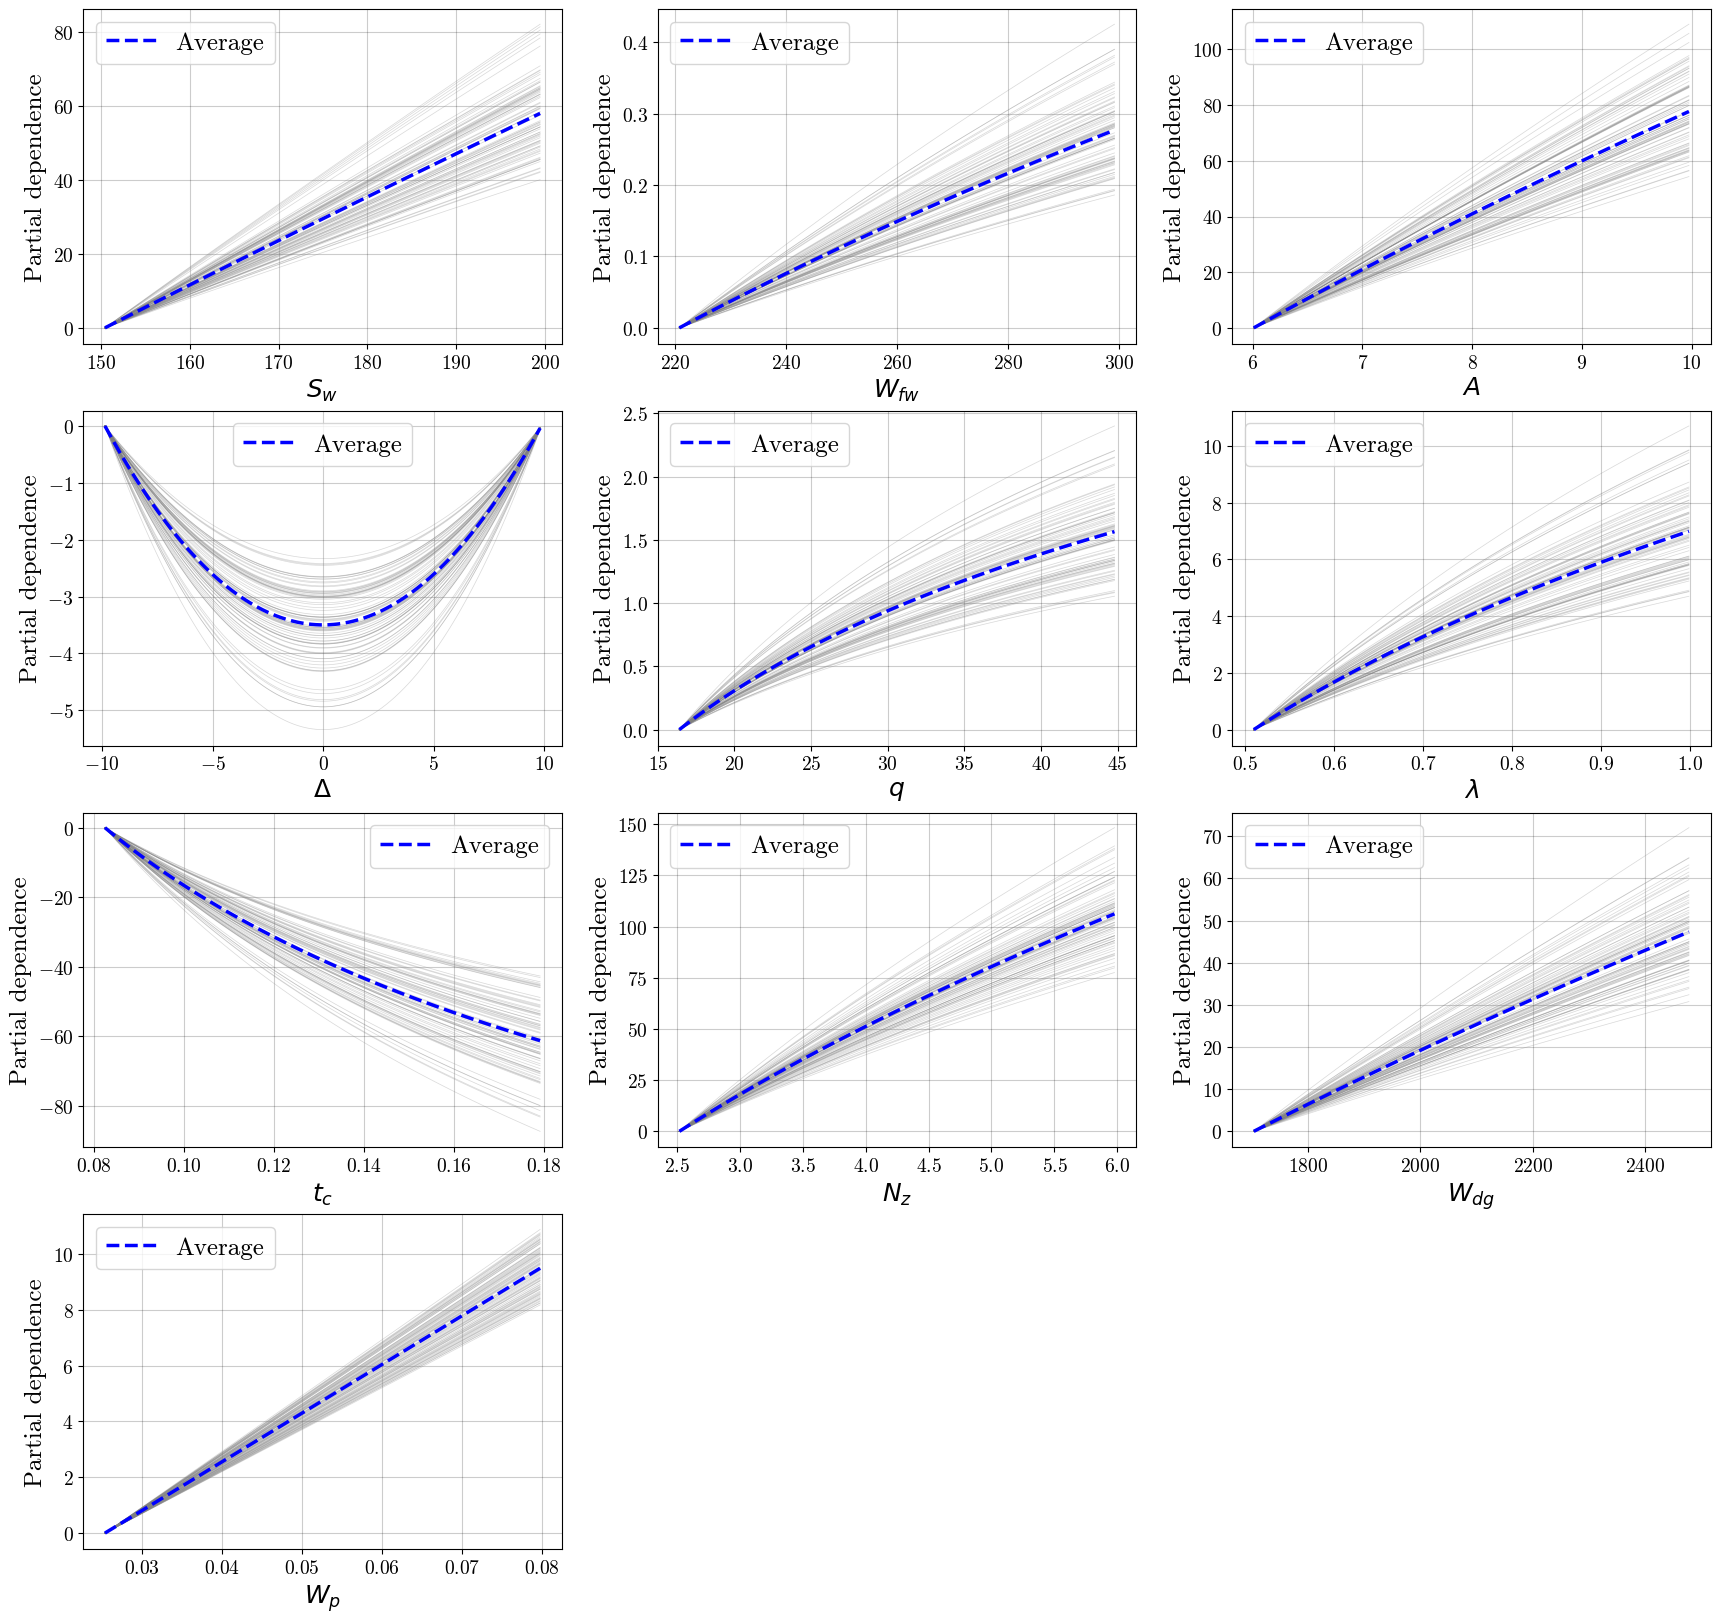

In [13]:
model = gtm
features = [i for i in range(X_tr.shape[1])]

gt_pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
    percentiles=(0.01, 0.99),
)
gt_pdd_fig_1d = gt_pdd.plot(centered=True)
gt_pdd_fig_1d

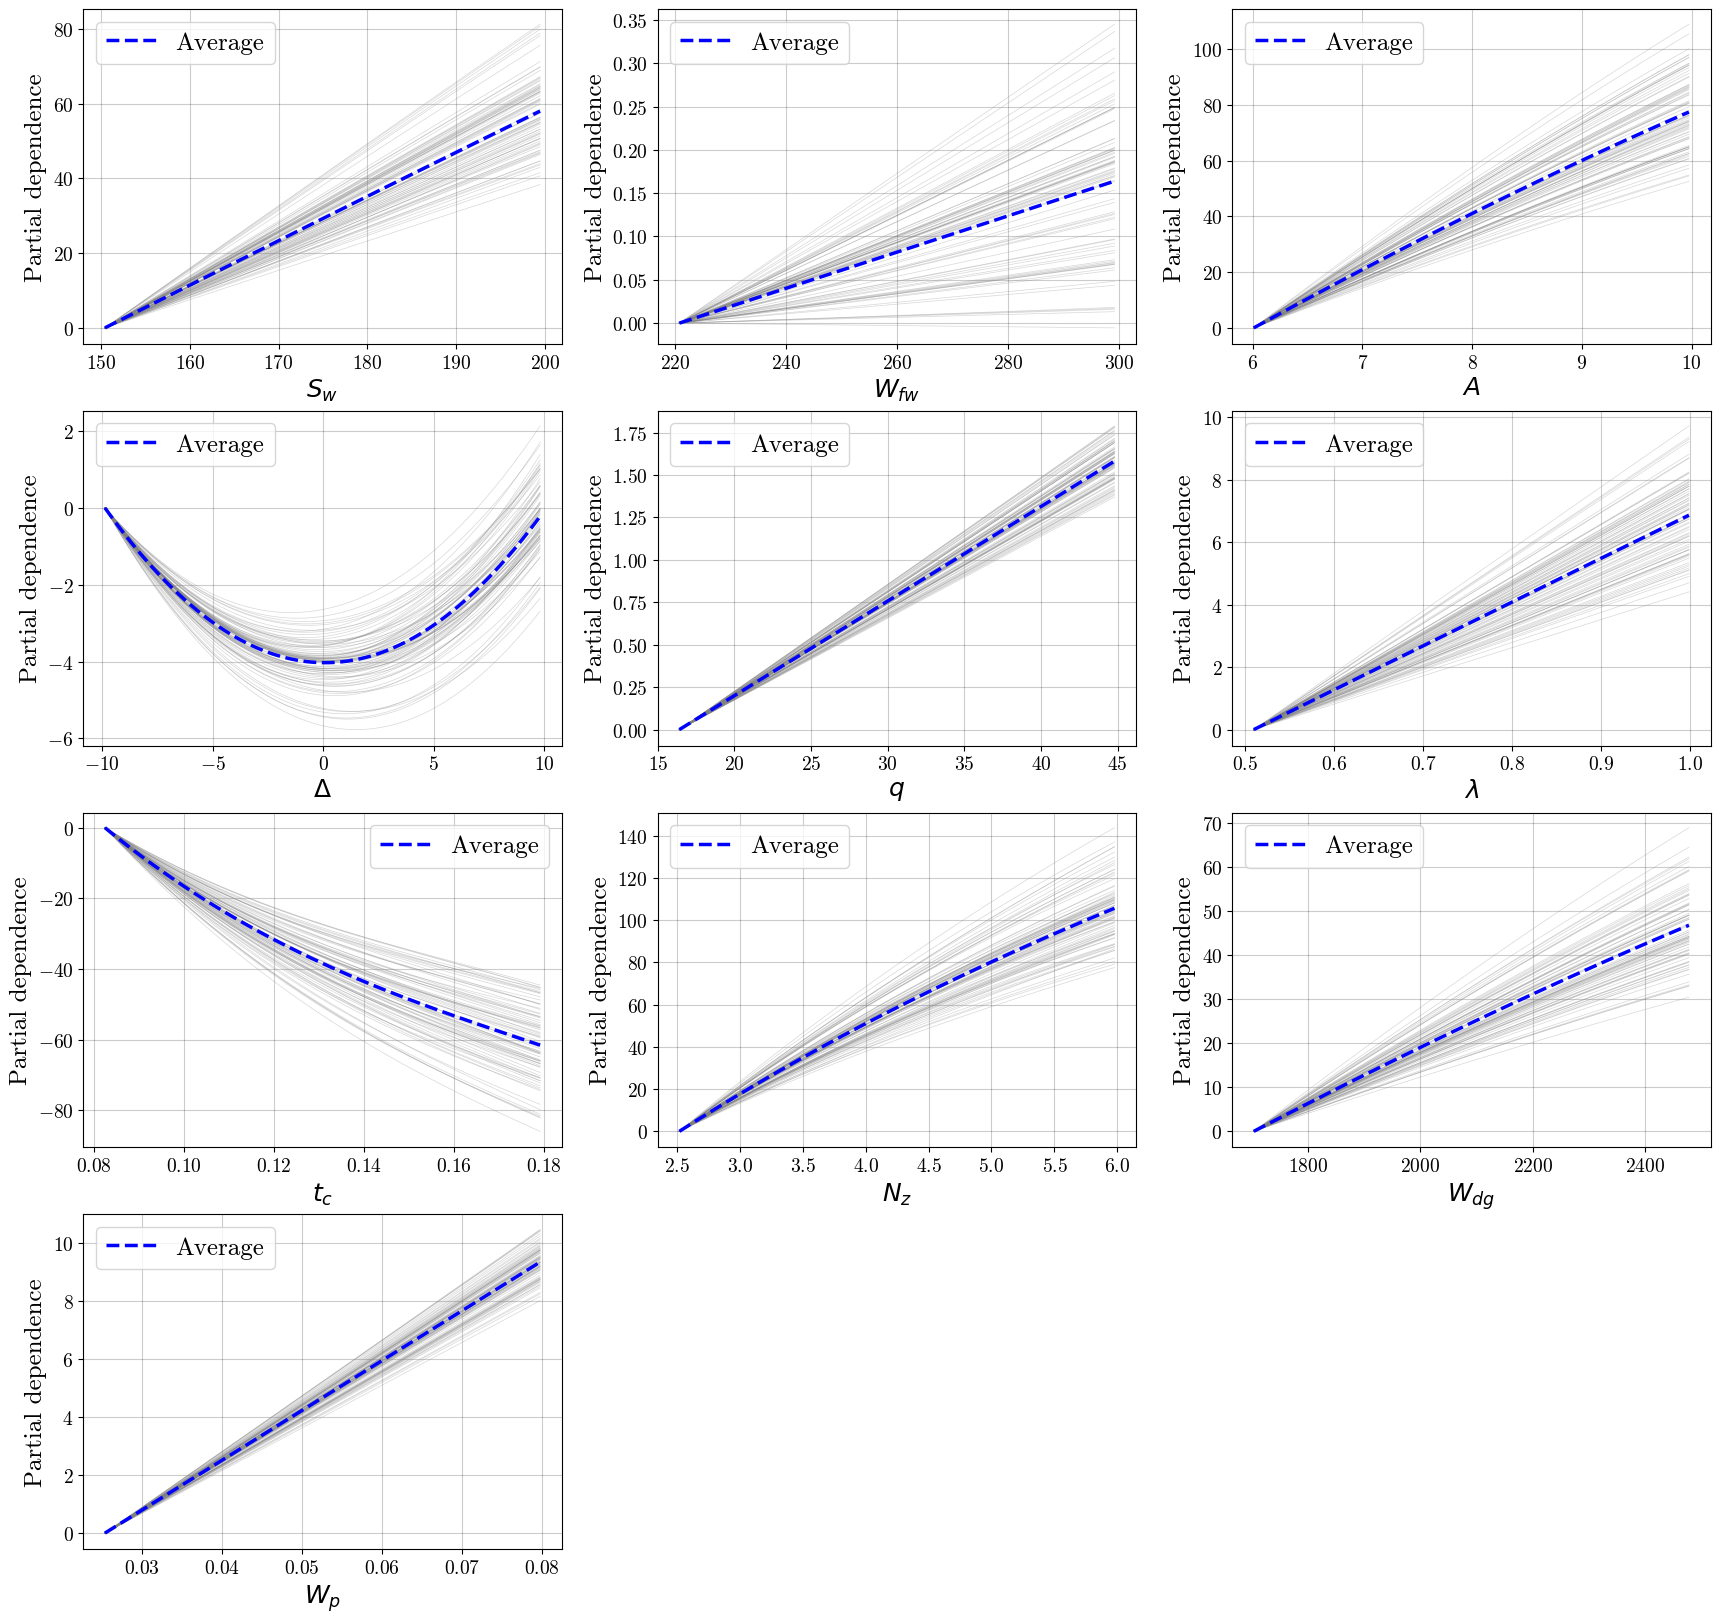

In [12]:
model = sm
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
    percentiles=(0.01, 0.99),
)
pdd_fig_1d = pdd.plot(centered=True)
pdd_fig_1d

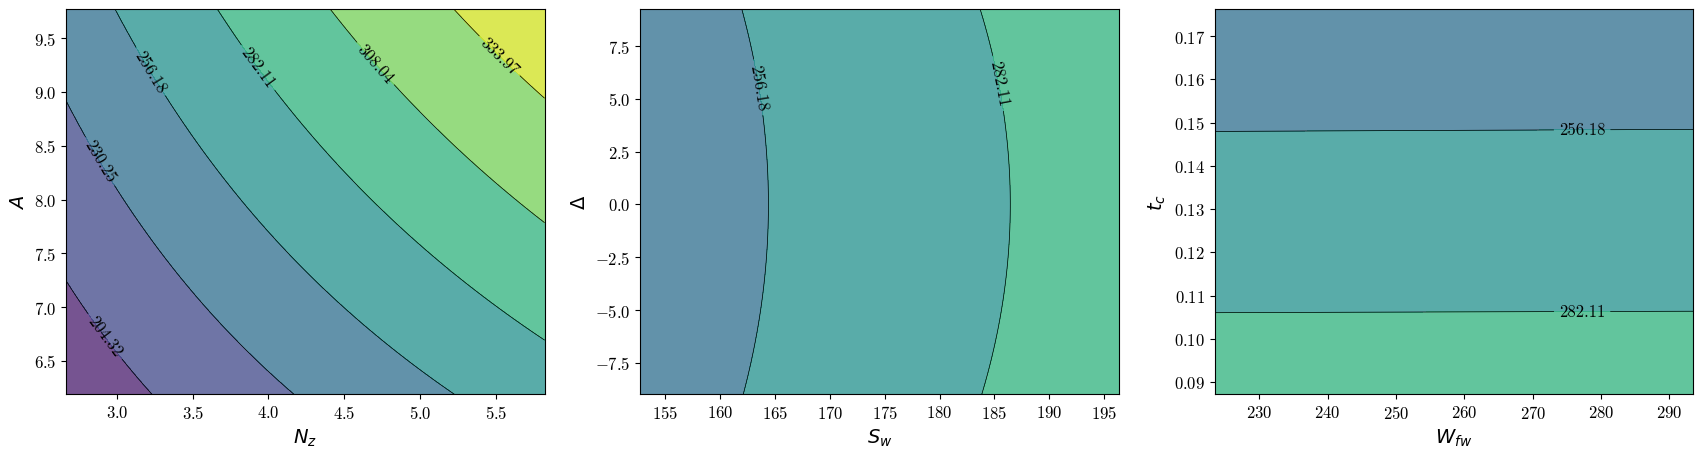

In [11]:
model = gtm
features = [(7, 2), (0, 3), (1, 6)]

gt_pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
)
gt_pdd_fig_2d = gt_pdd.plot()
gt_pdd_fig_2d

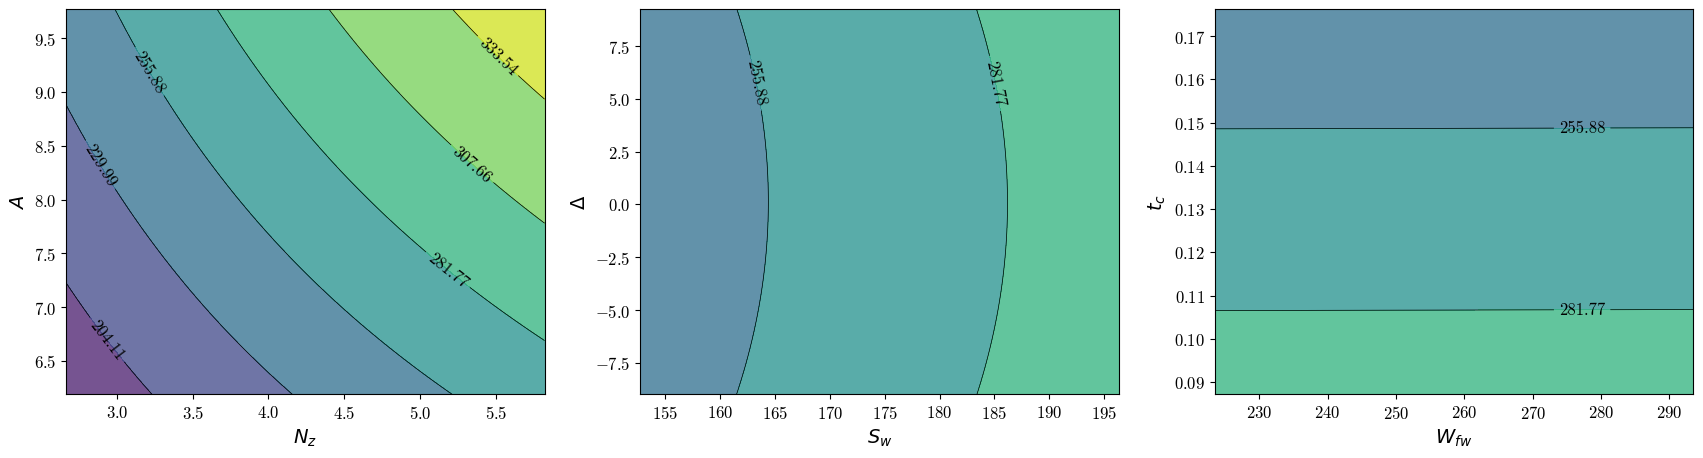

In [10]:
model = sm
features = [(7, 2), (0, 3), (1, 6)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
)
pdd_fig_2d = pdd.plot()
pdd_fig_2d

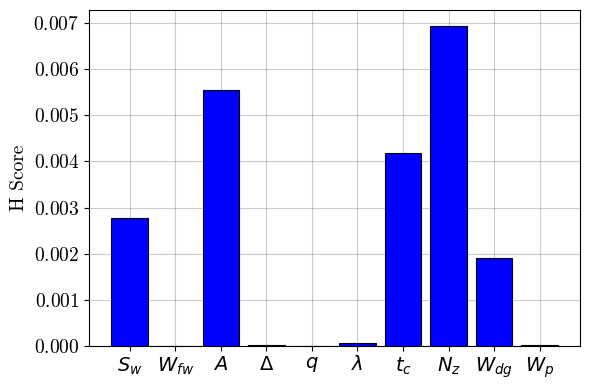

In [14]:
model = gtm

gt_overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
    feature_names=feature_names,
)
gt_overall_interaction_plot = gt_overall_pd_interaction.plot()
gt_overall_interaction_plot

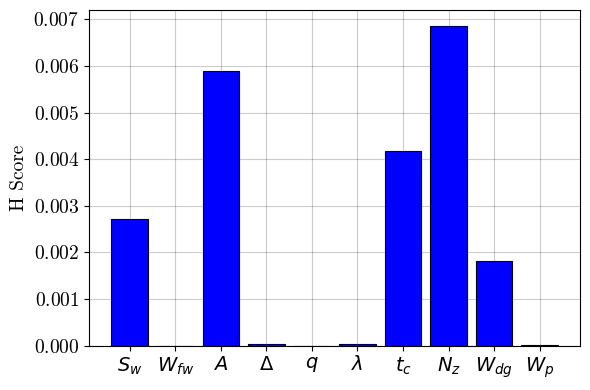

In [15]:
model = sm

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
    feature_names=feature_names,
)
overall_pd_interaction_plot = overall_pd_interaction.plot()
overall_pd_interaction_plot

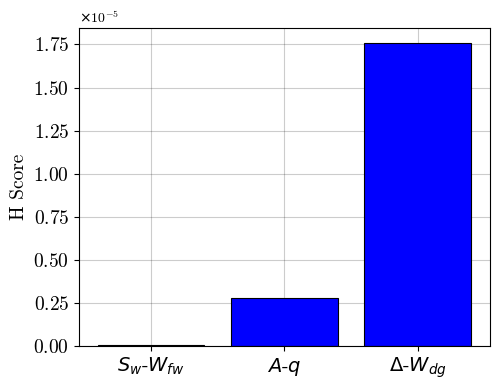

In [17]:
feature_pairs = [(0, 1), (2, 4), (3, 8)]

model = gtm
gt_pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X_tr,
    feature_pairs,
    feature_names=feature_names,
)
gt_pairwise_pd_interaction_plot = gt_pairwise_pd_interaction.plot()
gt_pairwise_pd_interaction_plot


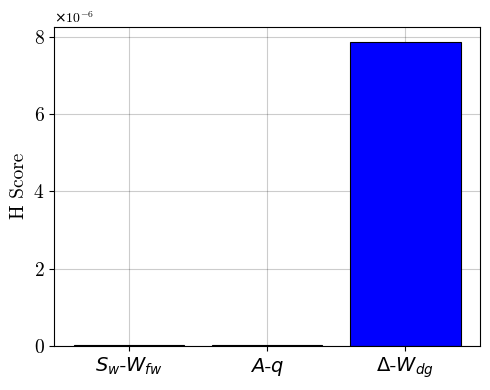

In [18]:
feature_pairs = [(0, 1), (2, 4), (3, 8)]

model = sm
pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X_tr,
    feature_pairs,
    feature_names=feature_names,
)
pairwise_pd_interaction_plot = pairwise_pd_interaction.plot()
pairwise_pd_interaction_plot
